In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [29]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df =pd.read_csv("C:\\Users\\matthew.yim\\PycharmProjects\\Kaggle\\magic+gamma+telescope\\magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [30]:
df["class"] = (df["class"] == "g").astype(int) 
# filtering out df where "class" = "g" and reloading it with the value of 1 --> .astype(int)

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


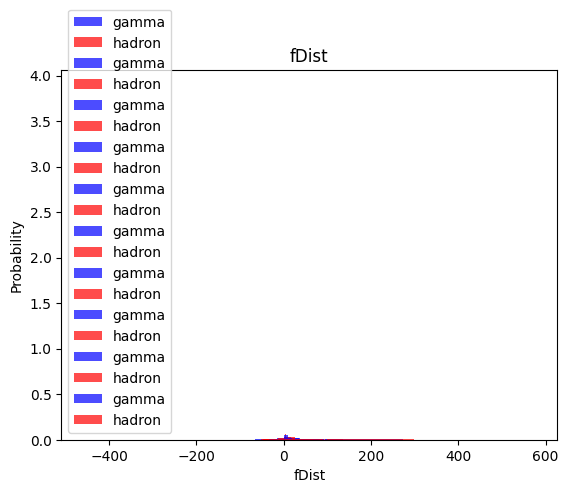

In [31]:
for label in cols[:-1]: # Get everything up to the last thing
    plt.hist(df[df["class"] == 1][label], color= 'blue', label='gamma', alpha=0.7, density=True) # alpha is transparency | density=true normalize the distributions 
    plt.hist(df[df["class"] == 0][label], color= 'red', label='hadron', alpha=0.7, density=True)
        # Image 200 red vs 50 blue --> histogram would look wack 
        # By normalizing them we are distributing them over how many samples there are
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, validation, test datasets

In [40]:
# Step 1: Shuffle the DataFrame
shuffled_df = df.sample(frac=1)

# Step 2: Calculate indices for splitting
split_index_60 = int(0.6 * len(df))
split_index_80 = int(0.8 * len(df))

# Step 3: Use df.iloc to slice the DataFrame
train = shuffled_df.iloc[:split_index_60]
valid = shuffled_df.iloc[split_index_60:split_index_80]
test = shuffled_df.iloc[split_index_80:]

# We need to scale the data due to some values being high 100s and some decimals

In [41]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:1]].values # take everything up to last column
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X) # take x and fit standard scaler to x and then transform all those values to be new x
    
    if oversample: 
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
        # Take more of the lesser class and keep sampling from there to increase the size of that class
    
    # X is 2dimension y is 1dimension
    data = np.hstack((X, np.reshape(y, (-1, 1)))) # Stack arrays side by side | np.reshape(y, (-1, 1)) same as np.reshape(y, (len(y), 1))
    # For example, if y is a 1D array with 6 elements, reshaping it with np.reshape(y, (-1, 1)) will result in a 2D array with 6 rows and 1 column
    return data, X, y

In [42]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)
# Don't care about balancing the test or validation since you want to know giving a random set of data that's unlabeled, can I trust my model

kNN


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [51]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred = knn_model.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.42      0.53      0.47      1335
           1       0.70      0.60      0.65      2469

    accuracy                           0.57      3804
   macro avg       0.56      0.56      0.56      3804
weighted avg       0.60      0.57      0.58      3804


Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44      1335
           1       0.71      0.85      0.78      2469

    accuracy                           0.68      3804
   macro avg       0.64      0.60      0.61      3804
weighted avg       0.66      0.68      0.66      3804


Log Regression


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [59]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46      1335
           1       0.71      0.71      0.71      2469

    accuracy                           0.62      3804
   macro avg       0.59      0.59      0.59      3804
weighted avg       0.62      0.62      0.62      3804


SVM

In [60]:
from sklearn.svm import SVC

In [61]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [62]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.27      0.41      1335
           1       0.71      0.96      0.82      2469

    accuracy                           0.72      3804
   macro avg       0.75      0.62      0.61      3804
weighted avg       0.74      0.72      0.67      3804


Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation="relu", input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid") # keep output between 0 and 1
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001, loss="binary_crossentropy",
                                                        metrics=['accuracy']))
    
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    return nn_model, history
# Every epoch or training cycle
# If validation_split=0.2 --> leave 20% out of training data and test how model performs on this 20% dataset
#verbose=0 means don't print everything like the loading screen

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for learning_rate in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning_rate {learning_rate},batch_size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
                plot_history(history)
                plot_accuracy(history)
                val_loss =model.evaluate(X_valid, y_valid)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [ ]:
print(classification_report(y_test, y_pred))

In [22]:
len(y_train)


14828

In [23]:
sum(y_train == 1)

7414

In [24]:
sum(y_train == 0)
# To make sure the split of training dataset is the same

7414

In [13]:
print(len(train[train["class"] == 1])) # Gamma
print(len(train[train["class"] == 0])) # Hadron

# We need to oversample our training dataset, so what that means is equalize the amount in each split

7414
3998
